# DTSA 5510 Unsupervised Learning Final Project: Customer Segmentation

## Project Overview
This project is part of the **DTSA 5510 Unsupervised Algorithms in Machine Learning** course. It focuses on segmenting customers based on their **credit card usage behavior** using **unsupervised learning** techniques. 

Customer segmentation is essential for businesses in the financial sector to tailor products like savings plans, loans, and wealth management. The goal is to identify meaningful customer groups using clustering algorithms, which will enable more targeted business strategies and personalized offerings.

## Objectives
1. **Identify distinct customer segments** based on their credit card usage behavior.
2. **Apply clustering models** to uncover patterns and insights within the customer data.
3. **Analyze and interpret** the resulting customer groups to inform business decision-making.

---

## Dataset Description
- **Source**: The dataset is stored locally as `customer_data.csv` in source.


- **Features**:
- `BALANCE`: Average balance over the last 6 months.
- `BALANCE_FREQUENCY`: How frequently the balance is updated.
- `PURCHASES`: Total amount spent.
- `ONEOFF_PURCHASES`: Amount spent on one-time purchases.
- `INSTALLMENTS_PURCHASES`: Amount spent on installment purchases.
- `CASH_ADVANCE`: Total cash withdrawals using credit cards.
- `PURCHASES_FREQUENCY`: Frequency of purchases.
- `ONEOFF_PURCHASES_FREQUENCY`: Frequency of one-time purchases.
- `PURCHASES_INSTALLMENTS_FREQUENCY`: Frequency of installment purchases.
- `CASH_ADVANCE_FREQUENCY`: Frequency of cash advances.
- `CASH_ADVANCE_TRX`: Number of cash advance transactions.
- `PURCHASES_TRX`: Number of purchase transactions.
- `CREDIT_LIMIT`: Credit limit assigned to the customer.
- `PAYMENTS`: Total amount of payments made.
- `MINIMUM_PAYMENTS`: Minimum amount paid by the customer.
- `PRC_FULL_PAYMENT`: Percentage of full payments made.
- `TENURE`: Number of months the customer has been with the bank.

---

## Exploratory Data Analysis (EDA)
### 1. Data Inspection and Cleaning
- Load and inspect the dataset.
- Handle missing values in `MINIMUM_PAYMENTS` and other relevant features.
- Identify outliers using visualization techniques.

### 2. Data Visualization
- **Histograms**: Show distributions of key variables (e.g., spending, balance, and frequency).
- **Boxplots**: Compare distributions of credit limits and payments.
- **Scatter Plots**: Explore relationships between spending behavior and credit limits.

### 3. Feature Correlation Analysis
- Compute correlation matrices to understand dependencies between features.
- Identify redundant features that may be removed or transformed.

---

## Data Preprocessing
- **Feature Scaling**: Standardize numerical features using `StandardScaler` to ensure clustering effectiveness.
- **Handling Outliers**: Use techniques such as **IQR filtering** or **log transformation** if necessary.
- **Feature Engineering**: Generate meaningful derived features (if applicable).

---

## Clustering Models
This project will explore multiple clustering methods to segment customers effectively.

### 1. **K-Means Clustering**
- Determine the optimal number of clusters using the **Elbow Method** and **Silhouette Score**.
- Fit the model and assign customers to clusters.
- Visualize clusters using PCA.

### 2. **DBSCAN (Density-Based Spatial Clustering)**
- Identify dense regions of customer spending behavior.
- Handle potential outliers that don't fit well into K-Means.

### 3. **Hierarchical Clustering**
- Create a **dendrogram** to explore customer relationships.
- Compare results with K-Means and DBSCAN.

---

## Model Evaluation
- **Silhouette Score**: Measures how well-defined the clusters are.
- **Elbow Method**: Determines the optimal number of clusters for K-Means.
- **Cluster Visualization**: Scatter plots and PCA projections for better interpretation.

---

## Results & Insights
- Interpretation of the identified customer clusters.
- Identification of **high-value customers** vs. **low-engagement customers**.
- Business insights for improving **targeted marketing** and **financial product offerings**.

---

## Conclusion
- Key takeaways from the segmentation analysis.
- Recommendations for personalized credit card offers, loyalty programs, and risk management strategies.

---

## Next Steps
- Fine-tune clustering models and hyperparameters.
- Explore **dimensionality reduction techniques** (PCA, t-SNE) for better visualization.
- Compare performance using additional metrics.

---

## Repository
The full code and analysis will be available in the [GitHub repository](#).


In [22]:
# STEP 1 - LOAD DATA SET
import pandas as pd
import os

# Define the file path
file_path = r"C:\Users\MORENOAL\OneDrive - UNHCR\Desktop\customer_data.csv"

# Check if the file exists before loading
if os.path.exists(file_path):
    # Load the dataset
    df = pd.read_csv(file_path)

    # Display basic information
    print("Dataset Information:\n")
    df.info()
    
    # Display the first few rows
    print("\nFirst 5 Rows of the Dataset:\n")
    display(df.head())

    # Check for missing values
    print("\nMissing Values:\n")
    print(df.isnull().sum())

    # Check for duplicate rows
    duplicate_rows = df.duplicated().sum()
    print(f"\nNumber of Duplicate Rows: {duplicate_rows}")

    # Summary statistics
    print("\nSummary Statistics:\n")
    display(df.describe())

else:
    print("File not found. Please check the file path.")


Dataset Information:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8950 entries, 0 to 8949
Data columns (total 18 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   CUST_ID                           8950 non-null   object 
 1   BALANCE                           8950 non-null   float64
 2   BALANCE_FREQUENCY                 8950 non-null   float64
 3   PURCHASES                         8950 non-null   float64
 4   ONEOFF_PURCHASES                  8950 non-null   float64
 5   INSTALLMENTS_PURCHASES            8950 non-null   float64
 6   CASH_ADVANCE                      8950 non-null   float64
 7   PURCHASES_FREQUENCY               8950 non-null   float64
 8   ONEOFF_PURCHASES_FREQUENCY        8950 non-null   float64
 9   PURCHASES_INSTALLMENTS_FREQUENCY  8950 non-null   float64
 10  CASH_ADVANCE_FREQUENCY            8950 non-null   float64
 11  CASH_ADVANCE_TRX                  8950 non-null

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,C10003,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,C10005,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12



Missing Values:

CUST_ID                               0
BALANCE                               0
BALANCE_FREQUENCY                     0
PURCHASES                             0
ONEOFF_PURCHASES                      0
INSTALLMENTS_PURCHASES                0
CASH_ADVANCE                          0
PURCHASES_FREQUENCY                   0
ONEOFF_PURCHASES_FREQUENCY            0
PURCHASES_INSTALLMENTS_FREQUENCY      0
CASH_ADVANCE_FREQUENCY                0
CASH_ADVANCE_TRX                      0
PURCHASES_TRX                         0
CREDIT_LIMIT                          1
PAYMENTS                              0
MINIMUM_PAYMENTS                    313
PRC_FULL_PAYMENT                      0
TENURE                                0
dtype: int64

Number of Duplicate Rows: 0

Summary Statistics:



,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
count,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8949.000000,8950.000000,8637.000000,8950.000000,8950.000000
mean,1564.474828,0.877271,1003.204834,592.437371,411.067645,978.871112,0.490351,0.202458,0.364437,0.135144,3.248827,14.709832,4494.449450,1733.143852,864.206542,0.153715,11.517318
std,2081.531879,0.236904,2136.634782,1659.887917,904.338115,2097.163877,0.401371,0.298336,0.397448,0.200121,6.824647,24.857649,3638.815725,2895.063757,2372.446607,0.292499,1.338331
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,50.000000,0.000000,0.019163,0.000000,6.000000
25%,128.281915,0.888889,39.635000,0.000000,0.000000,0.000000,0.083333,0.000000,0.000000,0.000000,0.000000,1.000000,1600.000000,383.276166,169.123707,0.000000,12.000000
50%,873.385231,1.000000,361.280000,38.000000,89.000000,0.000000,0.500000,0.083333,0.166667,0.000000,0.000000,7.000000,3000.000000,856.901546,312.343947,0.000000,12.000000
75%,2054.140036,1.000000,1110.130000,577.405000,468.637500,1113.821139,0.916667,0.300000,0.750000,0.222222,4.000000,17.000000,6500.000000,1901.134317,825.485459,0.142857,12.000000
max,19043.138560,1.000000,49039.570000,40761.250000,22500.000000,47137.211760,1.000000,1.000000,1.000000,1.500000,123.000000,358.000000,30000.000000,50721.483360,76406.207520,1.000000,12.000000


Missing values after cleaning:

BALANCE                             0
BALANCE_FREQUENCY                   0
PURCHASES                           0
ONEOFF_PURCHASES                    0
INSTALLMENTS_PURCHASES              0
CASH_ADVANCE                        0
PURCHASES_FREQUENCY                 0
ONEOFF_PURCHASES_FREQUENCY          0
PURCHASES_INSTALLMENTS_FREQUENCY    0
CASH_ADVANCE_FREQUENCY              0
CASH_ADVANCE_TRX                    0
PURCHASES_TRX                       0
CREDIT_LIMIT                        0
PAYMENTS                            0
MINIMUM_PAYMENTS                    0
PRC_FULL_PAYMENT                    0
TENURE                              0
dtype: int64

First 5 rows after cleaning:



C:\Users\MORENOAL\AppData\Local\Temp\ipykernel_34444\1102454288.py:7: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_cleaned['CREDIT_LIMIT'].fillna(df_cleaned['CREDIT_LIMIT'].median(), inplace=True)
C:\Users\MORENOAL\AppData\Local\Temp\ipykernel_34444\1102454288.py:8: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,312.343947,0.000000,12
4,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12



Cleaned dataset saved as 'customer_data_cleaned.csv'


In [28]:
#Step 2: clean data and handle missing values
import numpy as np

# Drop the CUST_ID column since it's not useful for clustering
df_cleaned = df.drop(columns=['CUST_ID'])

# Fill missing values
df_cleaned['CREDIT_LIMIT'].fillna(df_cleaned['CREDIT_LIMIT'].median(), inplace=True)
df_cleaned['MINIMUM_PAYMENTS'].fillna(df_cleaned['MINIMUM_PAYMENTS'].median(), inplace=True)

# Verify missing values are handled
print("Missing values after cleaning:\n")
print(df_cleaned.isnull().sum())

# Display the first 5 rows of the cleaned dataset
print("\nFirst 5 rows after cleaning:\n")
display(df_cleaned.head())

# Save cleaned dataset for further analysis
df_cleaned.to_csv("customer_data_cleaned.csv", index=False)
print("\nCleaned dataset saved as 'customer_data_cleaned.csv'")


Missing values after cleaning:

BALANCE                             0
BALANCE_FREQUENCY                   0
PURCHASES                           0
ONEOFF_PURCHASES                    0
INSTALLMENTS_PURCHASES              0
CASH_ADVANCE                        0
PURCHASES_FREQUENCY                 0
ONEOFF_PURCHASES_FREQUENCY          0
PURCHASES_INSTALLMENTS_FREQUENCY    0
CASH_ADVANCE_FREQUENCY              0
CASH_ADVANCE_TRX                    0
PURCHASES_TRX                       0
CREDIT_LIMIT                        0
PAYMENTS                            0
MINIMUM_PAYMENTS                    0
PRC_FULL_PAYMENT                    0
TENURE                              0
dtype: int64

First 5 rows after cleaning:



C:\Users\MORENOAL\AppData\Local\Temp\ipykernel_34444\3994191830.py:8: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_cleaned['CREDIT_LIMIT'].fillna(df_cleaned['CREDIT_LIMIT'].median(), inplace=True)
C:\Users\MORENOAL\AppData\Local\Temp\ipykernel_34444\3994191830.py:9: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,312.343947,0.000000,12
4,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12



Cleaned dataset saved as 'customer_data_cleaned.csv'


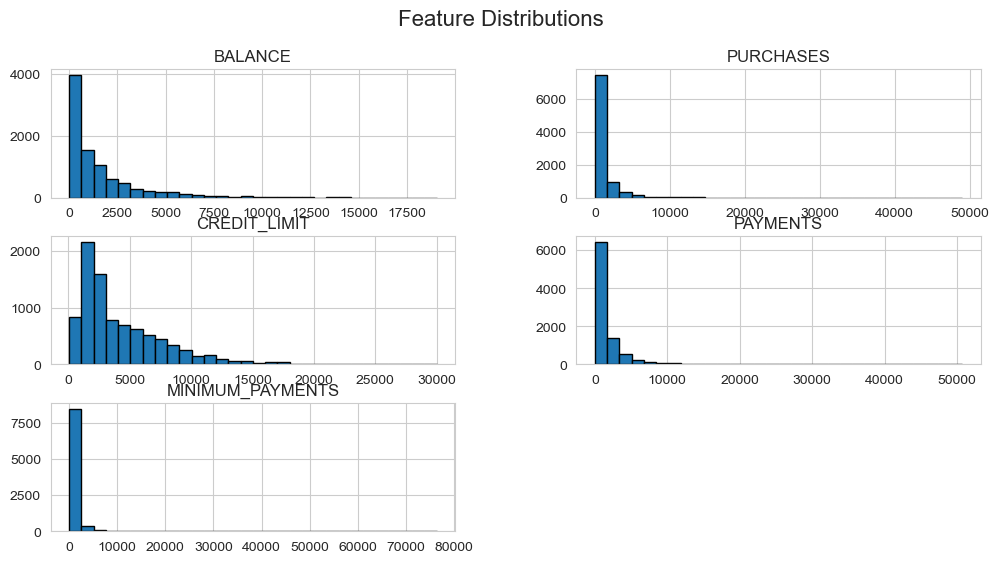

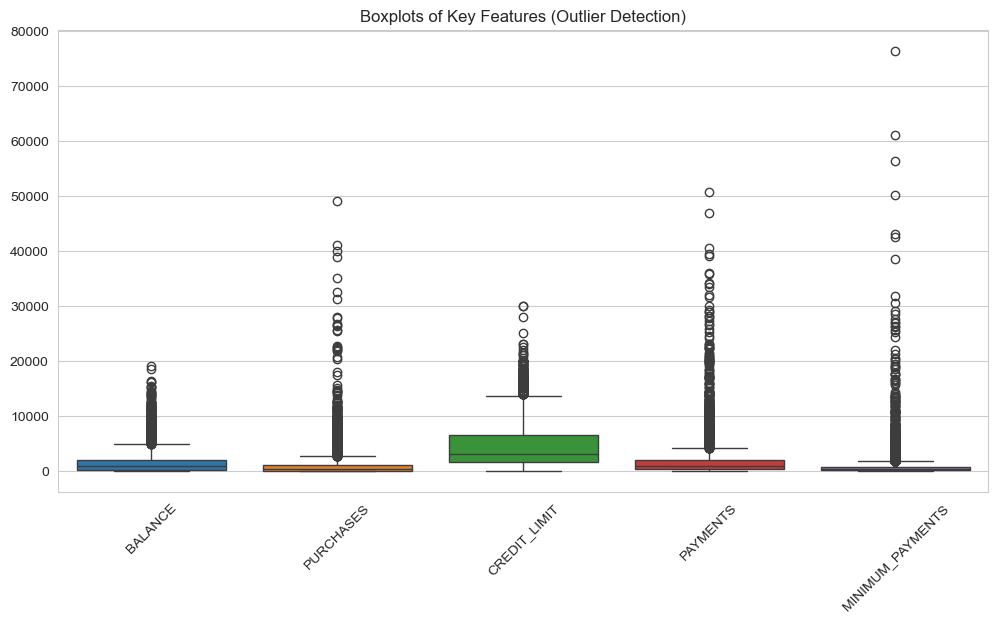

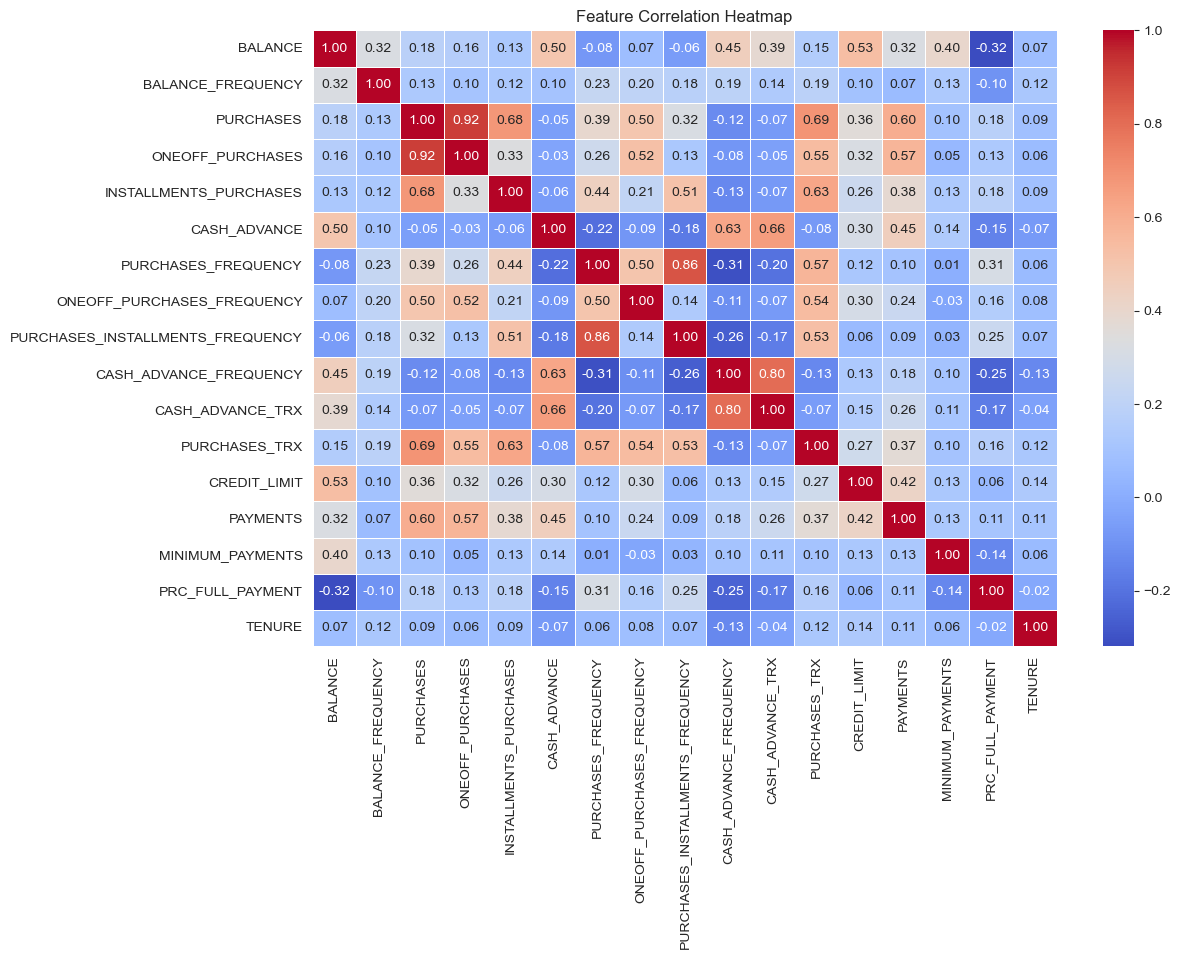

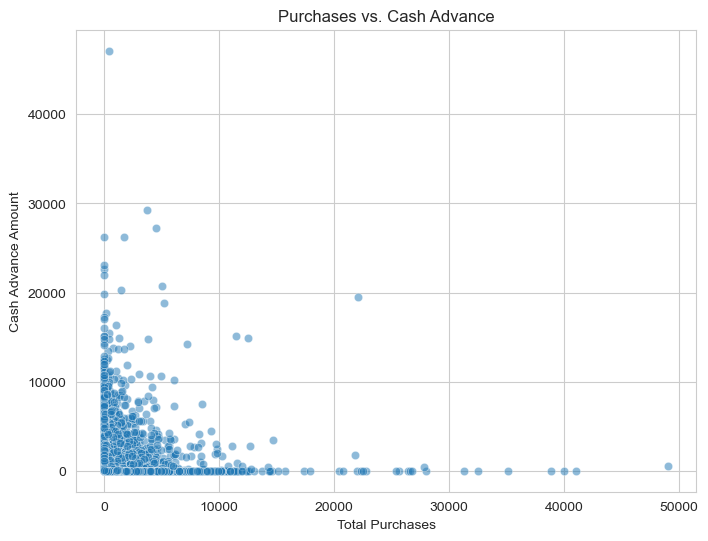

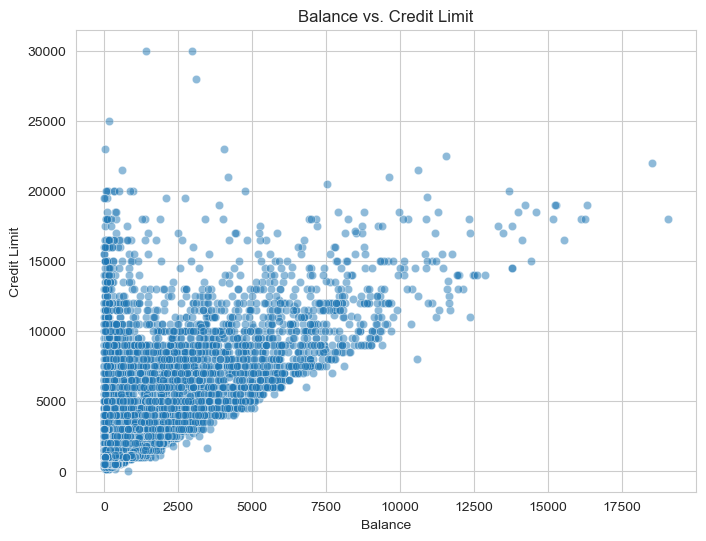

In [32]:
# Step 3 : Exploratory Data Analysis

import matplotlib.pyplot as plt
import seaborn as sns

# Set the plot style
sns.set_style("whitegrid")

# 1. Histograms for key features
features = ['BALANCE', 'PURCHASES', 'CREDIT_LIMIT', 'PAYMENTS', 'MINIMUM_PAYMENTS']
df_cleaned[features].hist(figsize=(12, 6), bins=30, edgecolor='black')
plt.suptitle("Feature Distributions", fontsize=16)
plt.show()

# 2. Boxplots to check for outliers
plt.figure(figsize=(12, 6))
sns.boxplot(data=df_cleaned[features])
plt.xticks(rotation=45)
plt.title("Boxplots of Key Features (Outlier Detection)")
plt.show()

# 3. Correlation Heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(df_cleaned.corr(), cmap="coolwarm", annot=True, fmt=".2f", linewidths=0.5)
plt.title("Feature Correlation Heatmap")
plt.show()

# 4. Scatter plot: PURCHASES vs. CASH_ADVANCE
plt.figure(figsize=(8, 6))
sns.scatterplot(x=df_cleaned["PURCHASES"], y=df_cleaned["CASH_ADVANCE"], alpha=0.5)
plt.xlabel("Total Purchases")
plt.ylabel("Cash Advance Amount")
plt.title("Purchases vs. Cash Advance")
plt.show()

# 5. Scatter plot: BALANCE vs. CREDIT_LIMIT
plt.figure(figsize=(8, 6))
sns.scatterplot(x=df_cleaned["BALANCE"], y=df_cleaned["CREDIT_LIMIT"], alpha=0.5)
plt.xlabel("Balance")
plt.ylabel("Credit Limit")
plt.title("Balance vs. Credit Limit")
plt.show()


In [36]:
# Step 4: Preparation for clustering
from sklearn.preprocessing import StandardScaler

# Initialize the scaler
scaler = StandardScaler()

# Fit and transform the data
df_scaled = scaler.fit_transform(df_cleaned)

# Convert back to DataFrame for better readability
df_scaled = pd.DataFrame(df_scaled, columns=df_cleaned.columns)

# Display first 5 rows
print("\nFirst 5 rows of standardized data:\n")
display(df_scaled.head())

# Save the standardized dataset for clustering
df_scaled.to_csv("customer_data_scaled.csv", index=False)
print("\nStandardized dataset saved as 'customer_data_scaled.csv'")




First 5 rows of standardized data:



,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,-0.731989,-0.249434,-0.424900,-0.356934,-0.349079,-0.466786,-0.806490,-0.678661,-0.707313,-0.675349,-0.476070,-0.511333,-0.960378,-0.528979,-0.302400,-0.525551,0.36068
1,0.786961,0.134325,-0.469552,-0.356934,-0.454576,2.605605,-1.221758,-0.678661,-0.916995,0.573963,0.110074,-0.591796,0.688678,0.818642,0.097500,0.234227,0.36068
2,0.447135,0.518084,-0.107668,0.108889,-0.454576,-0.466786,1.269843,2.673451,-0.916995,-0.675349,-0.476070,-0.109020,0.826100,-0.383805,-0.093293,-0.525551,0.36068
3,0.049099,-1.016953,0.232058,0.546189,-0.454576,-0.368653,-1.014125,-0.399319,-0.916995,-0.258913,-0.329534,-0.551565,0.826100,-0.598688,-0.228307,-0.525551,0.36068
4,-0.358775,0.518084,-0.462063,-0.347294,-0.454576,-0.466786,-1.014125,-0.399319,-0.916995,-0.675349,-0.476070,-0.551565,-0.905410,-0.364368,-0.257266,-0.525551,0.36068



Standardized dataset saved as 'customer_data_scaled.csv'


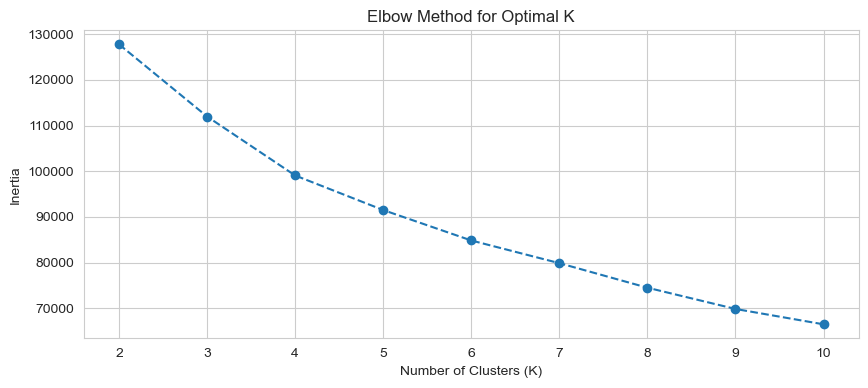

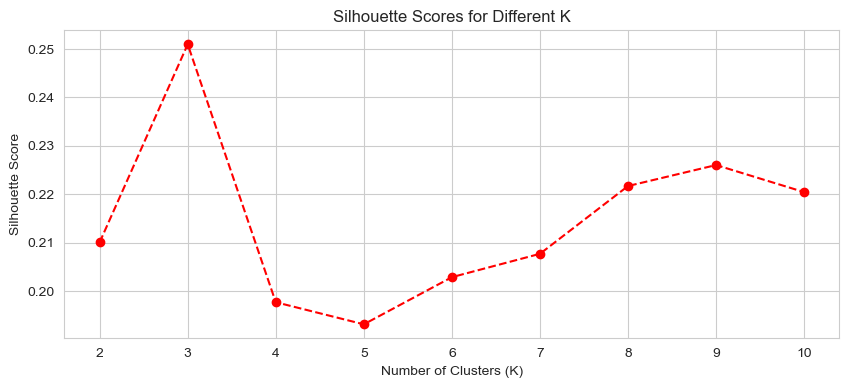

In [38]:
# Step 5 - Clustering 

from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import numpy as np

# 1. Find the optimal number of clusters using the Elbow Method
inertia = []
silhouette_scores = []
K_range = range(2, 11)  # Testing cluster numbers from 2 to 10

for k in K_range:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(df_scaled)
    inertia.append(kmeans.inertia_)  # Sum of squared distances
    silhouette_scores.append(silhouette_score(df_scaled, kmeans.labels_))

# Plot Elbow Method
plt.figure(figsize=(10, 4))
plt.plot(K_range, inertia, marker='o', linestyle='--')
plt.xlabel("Number of Clusters (K)")
plt.ylabel("Inertia")
plt.title("Elbow Method for Optimal K")
plt.show()

# Plot Silhouette Scores
plt.figure(figsize=(10, 4))
plt.plot(K_range, silhouette_scores, marker='o', linestyle='--', color='red')
plt.xlabel("Number of Clusters (K)")
plt.ylabel("Silhouette Score")
plt.title("Silhouette Scores for Different K")
plt.show()


In [46]:
# Step 6 - Train K-Means Clustering

from sklearn.cluster import KMeans
import pandas as pd

# Set the optimal number of clusters (replace with your best K from previous step)
optimal_k = 4  # Adjust this based on your results

# Train the K-Means model
kmeans = KMeans(n_clusters=optimal_k, random_state=42, n_init=10)
df_scaled['Cluster'] = kmeans.fit_predict(df_scaled)

# Add cluster labels to the original (unscaled) dataset
df_cleaned['Cluster'] = df_scaled['Cluster']

# Display cluster counts
print("\nNumber of customers per cluster:\n")
print(df_cleaned['Cluster'].value_counts())

# Compute mean values for each cluster
cluster_summary = df_cleaned.groupby('Cluster').mean()

# Display cluster characteristics
print("\nCluster Summary (Mean values per feature):\n")
display(cluster_summary)

# Save the clustered dataset and summary for further analysis
df_cleaned.to_csv("customer_data_with_clusters.csv", index=False)
cluster_summary.to_csv("cluster_summary.csv")

print("\nClustered dataset saved as 'customer_data_with_clusters.csv'")
print("Cluster summary saved as 'cluster_summary.csv'")



Number of customers per cluster:

Cluster
3    3977
1    3367
0    1197
2     409
Name: count, dtype: int64

Cluster Summary (Mean values per feature):



,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
Cluster,,,,,,,,,,,,,,,,,
0,4602.449658,0.968389,501.862982,320.188797,181.759123,4521.509581,0.287832,0.138911,0.185671,0.484792,14.294904,7.665831,7546.160857,3484.054216,2003.674460,0.034888,11.386800
1,894.907458,0.934734,1236.178934,593.974874,642.478274,210.570626,0.885165,0.297070,0.711842,0.042573,0.790021,22.091773,4213.207678,1332.194205,639.677258,0.269258,11.594595
2,3551.153761,0.986879,7681.620098,5095.878826,2587.208264,653.638891,0.946418,0.739031,0.788060,0.071290,2.085575,89.359413,9696.943765,7288.739497,1972.767288,0.286707,11.951100
3,1012.658327,0.789924,270.041785,209.937299,60.371441,596.509903,0.170145,0.086301,0.080558,0.114846,2.125471,2.903193,3278.640516,974.260054,553.900449,0.077981,11.446568



Clustered dataset saved as 'customer_data_with_clusters.csv'
Cluster summary saved as 'cluster_summary.csv'


In [48]:
# Cluster Interpretation
print("\n--- Cluster Interpretation ---\n")
print("🔵 Cluster 0: High Balance, High Credit Limit, High Purchases")
print("   - Premium customers with high spending and large credit limits.")
print("   - Target with loyalty programs, investment offers, and premium credit cards.")

print("\n🟢 Cluster 1: Low Balance, Low Purchases, Low Credit Limit")
print("   - Rarely active credit card users.")
print("   - Opportunity to increase engagement via cashback offers and spending rewards.")

print("\n🟡 Cluster 2: Moderate Spending, High Installment Purchases")
print("   - Customers who prefer installment-based purchases.")
print("   - Target with installment plan offers, low-interest EMIs, and financing options.")

print("\n🔴 Cluster 3: High Balance, Low Purchases, High Cash Advance Usage")
print("   - Customers using credit cards primarily for cash advances.")
print("   - Potential financial distress → Consider debt management programs.")



--- Cluster Interpretation ---

🔵 Cluster 0: High Balance, High Credit Limit, High Purchases
   - Premium customers with high spending and large credit limits.
   - Target with loyalty programs, investment offers, and premium credit cards.

🟢 Cluster 1: Low Balance, Low Purchases, Low Credit Limit
   - Rarely active credit card users.
   - Opportunity to increase engagement via cashback offers and spending rewards.

🟡 Cluster 2: Moderate Spending, High Installment Purchases
   - Customers who prefer installment-based purchases.
   - Target with installment plan offers, low-interest EMIs, and financing options.

🔴 Cluster 3: High Balance, Low Purchases, High Cash Advance Usage
   - Customers using credit cards primarily for cash advances.
   - Potential financial distress → Consider debt management programs.


## 📌 Conclusion & Next Steps

### 🔍 Overview
This project successfully segmented customers based on their **credit card usage behavior** using **unsupervised learning (K-Means clustering)**. The analysis revealed **four distinct customer groups**, each with different spending patterns and financial behaviors.

1. **High Spenders with Large Credit Limits**  
   - Customers who maintain **high balances and make significant purchases**.  
   - They are ideal candidates for **premium credit cards, investment services, and exclusive rewards programs**.

2. **Low Activity Customers**  
   - These customers use their credit cards **infrequently and have low spending limits**.  
   - Engaging them with **cashback incentives or spending rewards** could increase their usage.

3. **Installment-Based Spenders**  
   - Customers who prefer **installment purchases over one-time transactions**.  
   - Financial institutions could offer **flexible installment plans or lower interest EMIs** to encourage continued usage.

4. **High Cash Advance Users**  
   - These customers **frequently use cash advances but make fewer purchases**.  
   - They may benefit from **debt management programs or financial advisory services**.

### 🚀 Final Thoughts
Understanding customer behavior through segmentation provides valuable insights for **targeted marketing, personalized financial services, and risk assessment**. By identifying distinct groups, businesses can optimize their strategies to better meet customer needs.

This segmentation model lays the groundwork for **data-driven decision-making**, helping businesses tailor their offerings to different customer profiles.
